# PME3481 - Controle e Aplicações

## Resposta em Frequência

Dadas as funções de transferência obtidas, o objetivo é estudar a resposta em frequência do sistema e obter os diagramas de bode.

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

import warnings
warnings.filterwarnings('ignore')

### Funções de Transferência

In [2]:
G_1 = control.tf([ 0.,         0.04247186,  0. ,        -0.00021959,  0.        ],[ 1.00000000e+00,  2.53575404e-03, -5.17014925e-03, -1.31102268e-05,
  0.00000000e+00])

print(G_1)


          0.04247 s^3 - 0.0002196 s
----------------------------------------------
s^4 + 0.002536 s^3 - 0.00517 s^2 - 1.311e-05 s



(num,den) = control.pade(0.25,3)
Gp = control.tf(num,den)*G
print(Gp)

### Diagrama de Bode

In [3]:
(num,den) = control.pade(0.25,3)
Gp_1 = control.tf(num,den)*G_1

print(Gp_1)


-0.04247 s^6 + 2.039 s^5 - 40.77 s^4 + 326.2 s^3 + 0.2108 s^2 - 1.686 s
-----------------------------------------------------------------------
s^7 + 48 s^6 + 960.1 s^5 + 7682 s^4 + 14.51 s^3 - 39.72 s^2 - 0.1007 s



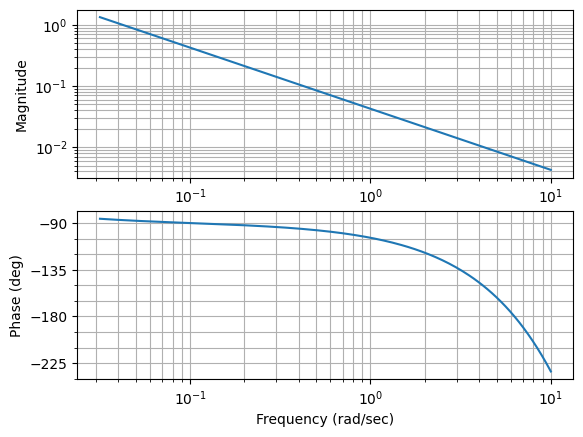

In [4]:
w = np.logspace(-1.5,1,200)
mag,phase,omega = control.bode(Gp_1,w)

Análise de Ganho de Fase e Frequência de Corte

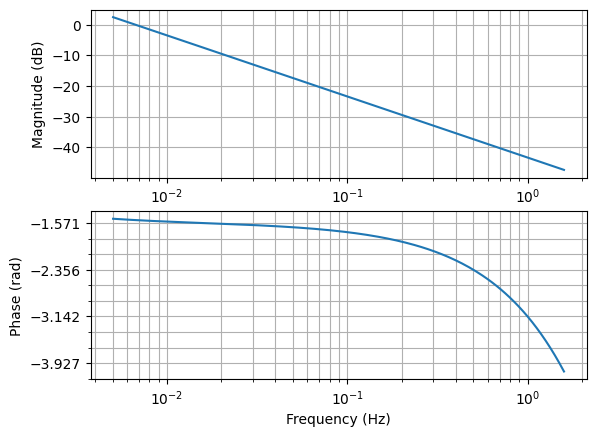

In [5]:
mag,phase,omega = control.bode(Gp_1,w,Hz=True,dB=True,deg=False)

Crossover freq =  10000.0  rad/sec
Gain at crossover =  4.2471859999998685e-06


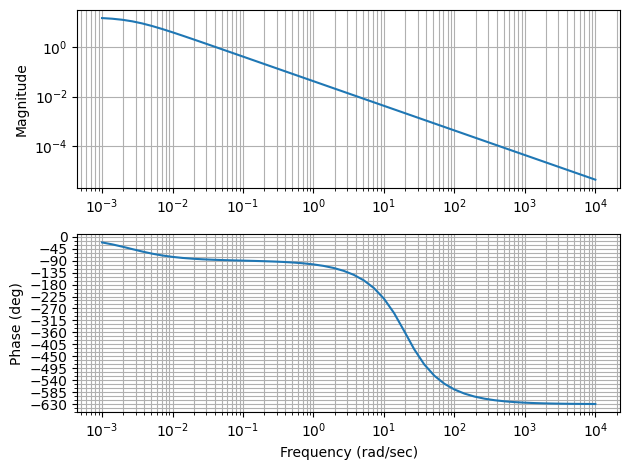

In [6]:
w = np.logspace(-3,4)
mag,phase,omega = control.bode(Gp_1,w);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)